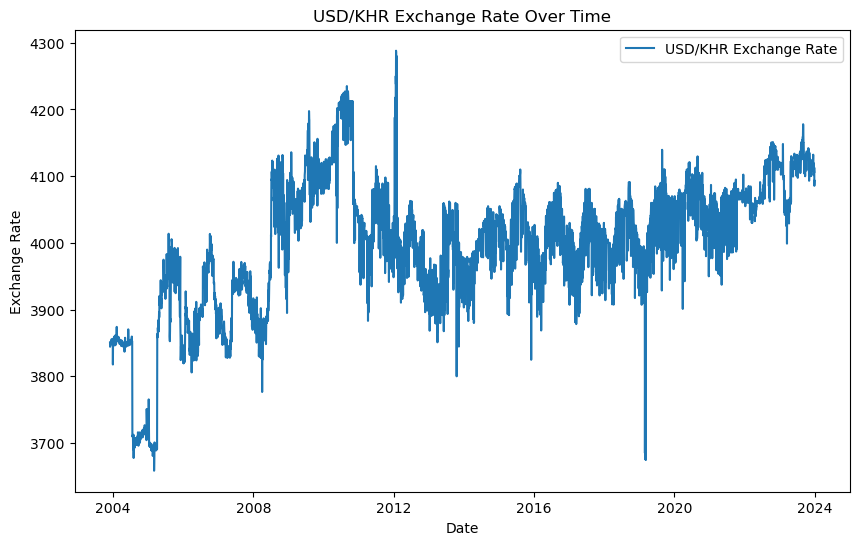

ADF Statistic: -3.305239838620742
p-value: 0.014645872097818218


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


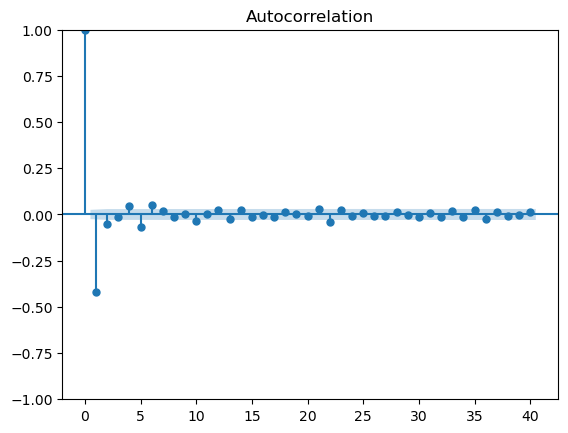

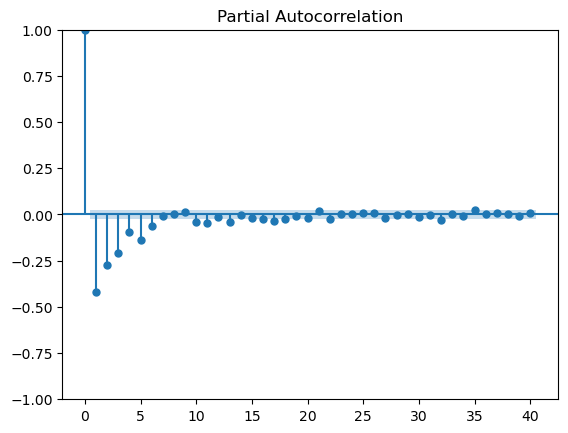

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 6032
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -28800.171
Date:                Wed, 14 Aug 2024   AIC                          57606.343
Time:                        22:37:37   BIC                          57626.457
Sample:                             0   HQIC                         57613.326
                               - 6032                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0881      0.009     10.227      0.000       0.071       0.105
ma.L1         -0.7253      0.007   -106.287      0.000      -0.739      -0.712
sigma2       822.8148      6.775    121.457      0.0

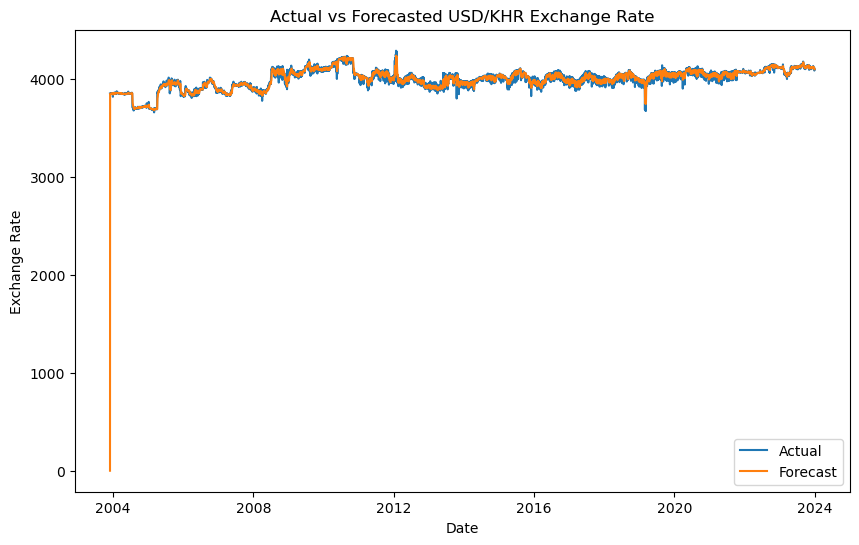

Mean Squared Error: 3280.501523123408
Mean Absolute Error: 18.780126581479813


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


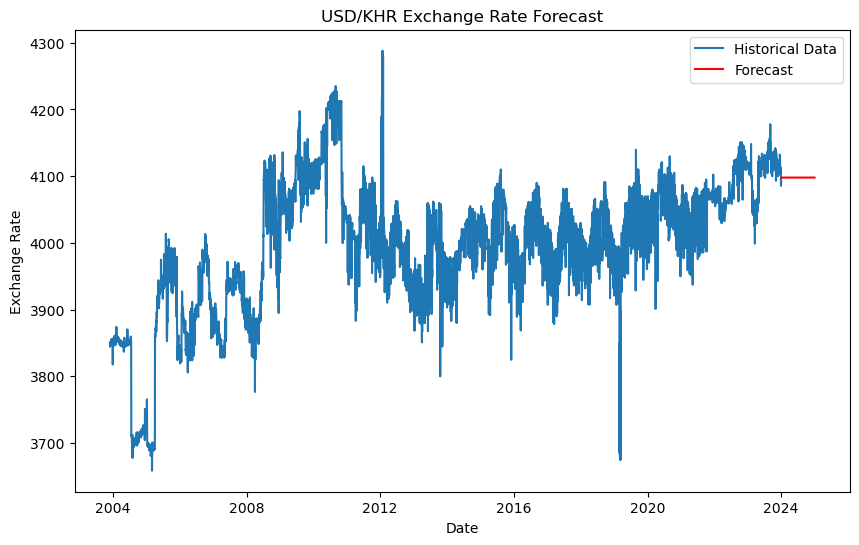

The ARIMA model forecasts the USD/KHR exchange rate for the next 365 days.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the data
data = pd.read_csv('usd-khr.csv', index_col='Date',
                   parse_dates=True, dayfirst=True)

# Preprocess the data
data['Date'] = pd.to_datetime(data.index)
# data = data.asfreq('D')
data.set_index('Date', inplace=True)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='USD/KHR Exchange Rate')
plt.title('USD/KHR Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Check for stationarity using ADF test
result = adfuller(data['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If the data is not stationary, differencing is needed
if result[1] > 0.05:
    data['Close_diff'] = data['Close'].diff().dropna()

    # Recheck stationarity on differenced data
    result_diff = adfuller(data['Close_diff'].dropna())
    print('Differenced ADF Statistic:', result_diff[0])
    print('Differenced p-value:', result_diff[1])

    # Visualize differenced data
    plt.figure(figsize=(10, 6))
    plt.plot(data['Close_diff'], label='Differenced USD/KHR Exchange Rate')
    plt.title('Differenced USD/KHR Exchange Rate')
    plt.xlabel('Date')
    plt.ylabel('Differenced Exchange Rate')
    plt.legend()
    plt.show()

# Determine ARIMA parameters using ACF and PACF
plot_acf(data['Close'].diff().dropna(), lags=40)
plot_pacf(data['Close'].diff().dropna(), lags=40)
plt.show()

# Fit the ARIMA model
model = ARIMA(data['Close'], order=(1, 1, 1))
arima_result = model.fit()

# Model summary
print(arima_result.summary())

# Evaluate the model
data['forecast'] = arima_result.predict(start=0, end=len(data)-1, typ='levels')
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Actual')
plt.plot(data['forecast'], label='Forecast')
plt.title('Actual vs Forecasted USD/KHR Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Calculate error metrics
mse = mean_squared_error(data['Close'], data['forecast'])
mae = mean_absolute_error(data['Close'], data['forecast'])
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

# Forecast future values
forecast_steps = 365
forecast = arima_result.forecast(steps=forecast_steps)
forecast_index = pd.date_range(
    start=data.index[-1], periods=forecast_steps+1, freq='D')[1:]

# Visualize forecast
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Historical Data')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('USD/KHR Exchange Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Interpretation
print(
    f"The ARIMA model forecasts the USD/KHR exchange rate for the next {forecast_steps} days.")